In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/A4_Q8

Mounted at /content/drive
/content/drive/MyDrive/A4_Q8


Data Explortaion: Different Data Plots

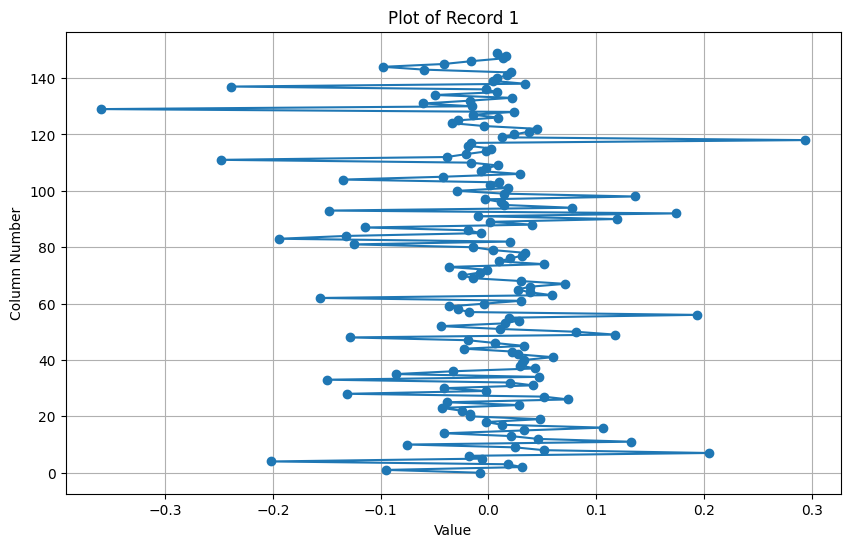

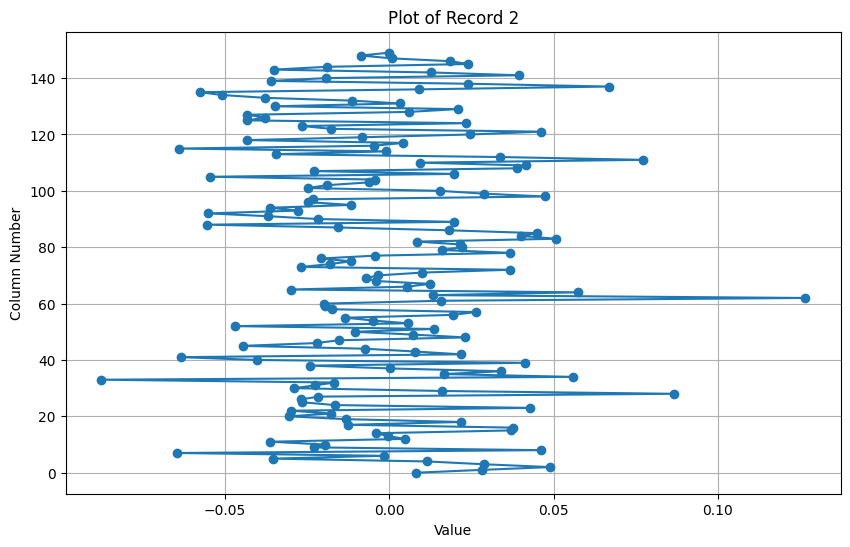

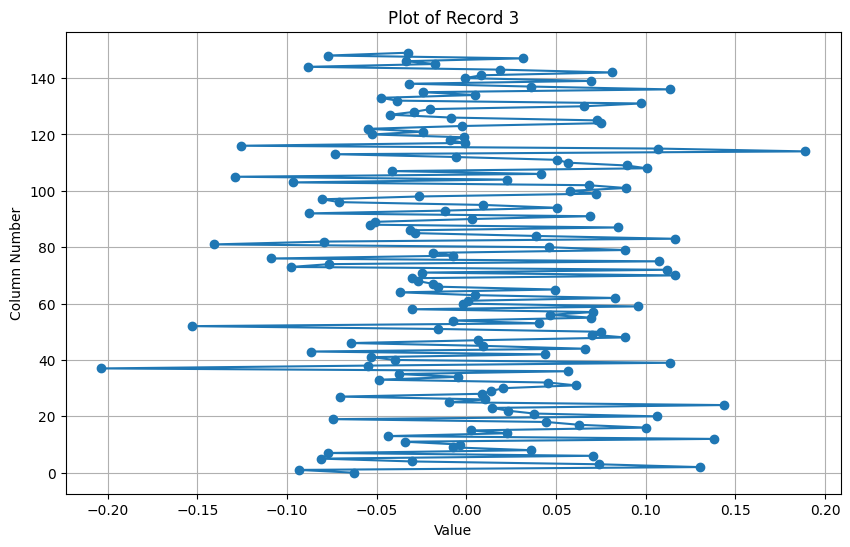

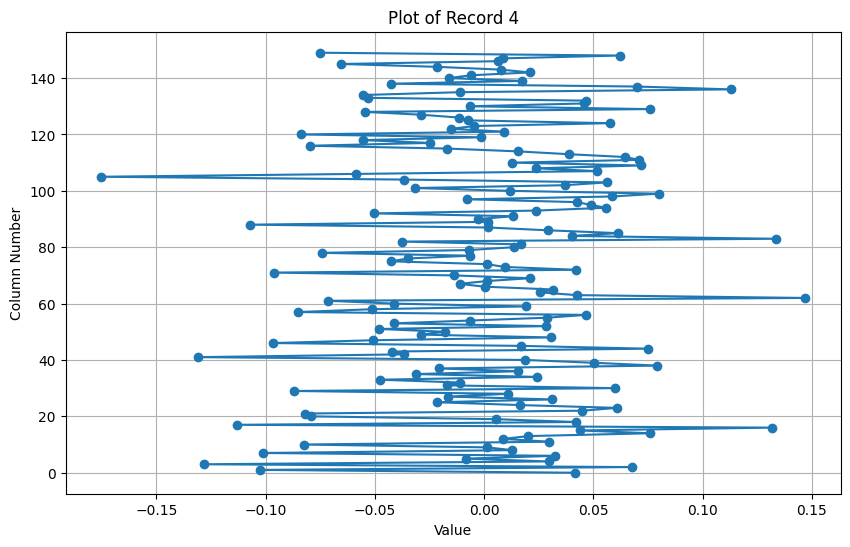

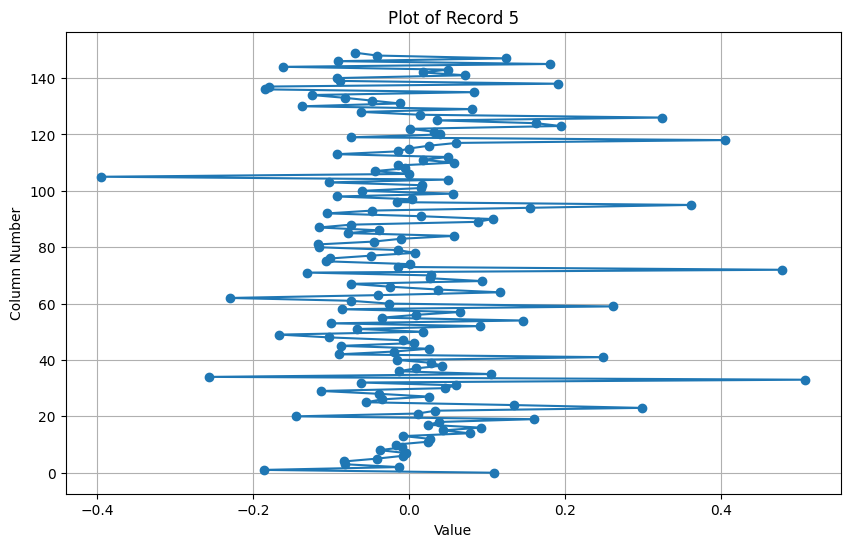

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('test.csv')
# Read only the first few rows to get column names
trimmed_df = df.iloc[:, :150]

# Create different plots
for i in range(0, 5):  # Create 5 different plots for the first 5 records
    plt.figure(figsize=(10, 6))
    plt.plot(trimmed_df.iloc[i].values, range(len(trimmed_df.iloc[i].values)), marker='o')
    plt.title(f'Plot of Record {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Column Number')
    plt.grid()
    plt.show()

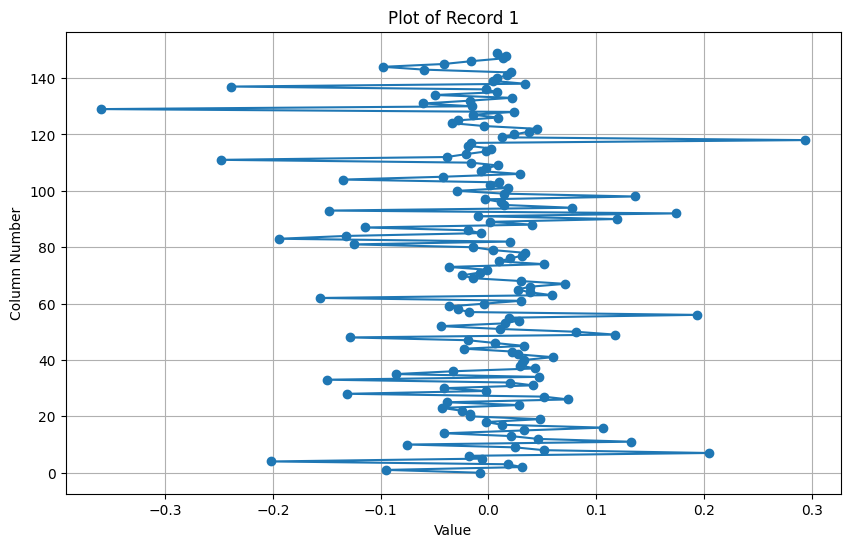

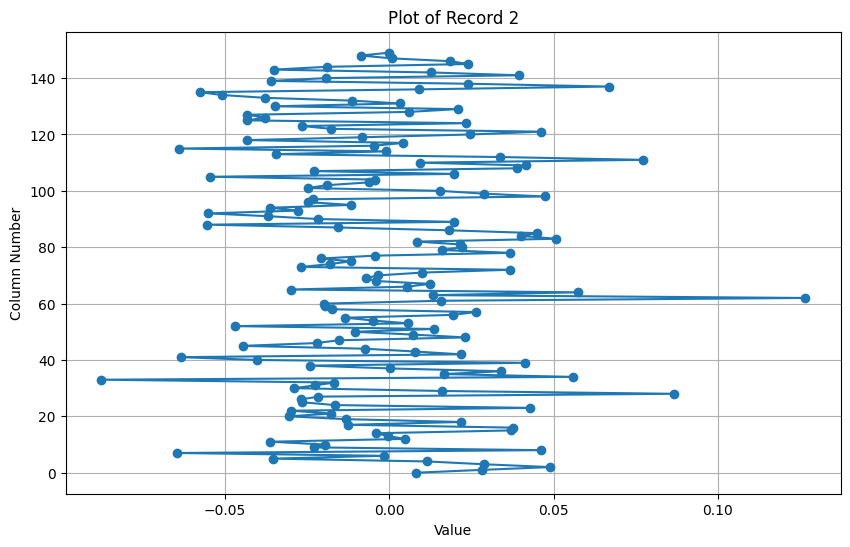

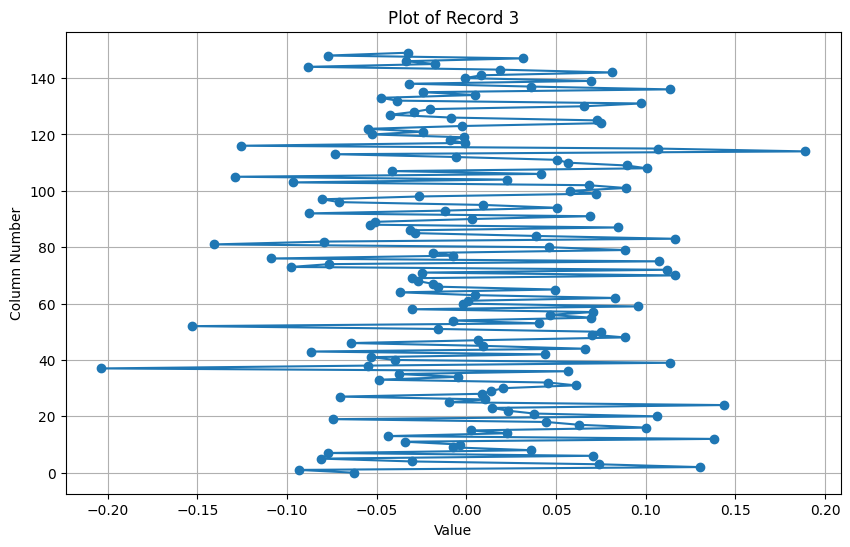

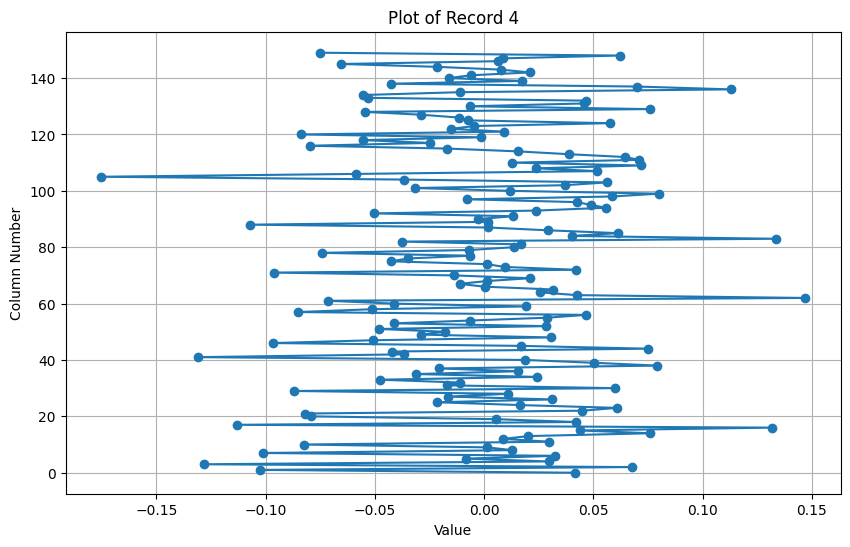

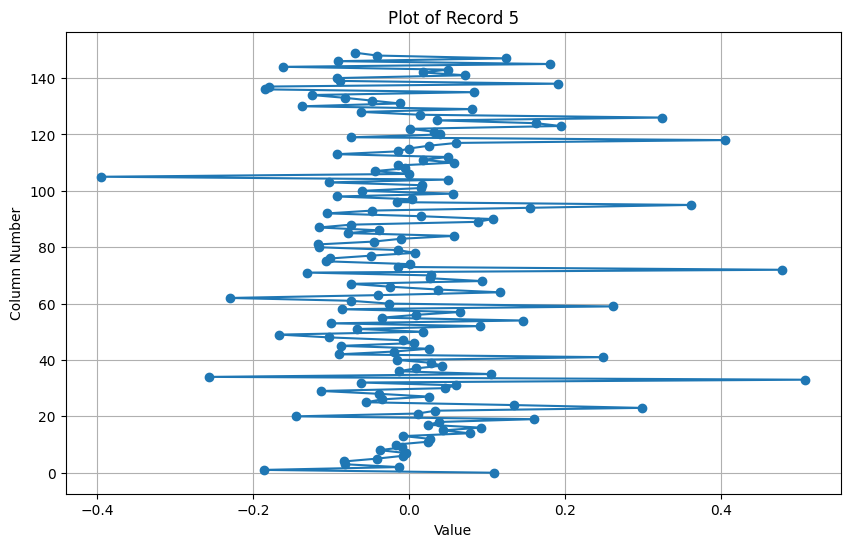

In [3]:
trimmed_df = df.iloc[:, :150]

# Create different plots
for i in range(0, 5):  # Create 5 different plots for the first 5 records
    plt.figure(figsize=(10, 6))
    plt.plot(trimmed_df.iloc[i].values, range(len(trimmed_df.iloc[i].values)), marker='o')
    plt.title(f'Plot of Record {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Column Number')
    plt.grid()
    plt.show()

In [4]:
import pandas as pd

# Assuming df is already loaded and available

# Display summary statistics
summary_stats = df.describe()
print(summary_stats)

                 0            1            2            3            4  \
count  1753.000000  1753.000000  1753.000000  1753.000000  1753.000000   
mean      0.010093    -0.011847     0.014363    -0.000590     0.000188   
std       0.031804     0.056449     0.034660     0.041855     0.049109   
min      -0.151980    -0.292890    -0.167120    -0.129700    -0.286800   
25%       0.000000    -0.025279     0.000000    -0.014981    -0.015605   
50%       0.009602     0.000000     0.018411     0.001687     0.001767   
75%       0.024249     0.004823     0.027249     0.011867     0.019167   
max       0.137340     0.201390     0.217600     0.314340     0.148150   

                 5            6            7            8            9  ...  \
count  1753.000000  1753.000000  1753.000000  1753.000000  1753.000000  ...   
mean     -0.013085    -0.002283    -0.096213    -0.009389    -0.005545  ...   
std       0.036109     0.033523     0.093830     0.059213     0.036995  ...   
min      -0.22361

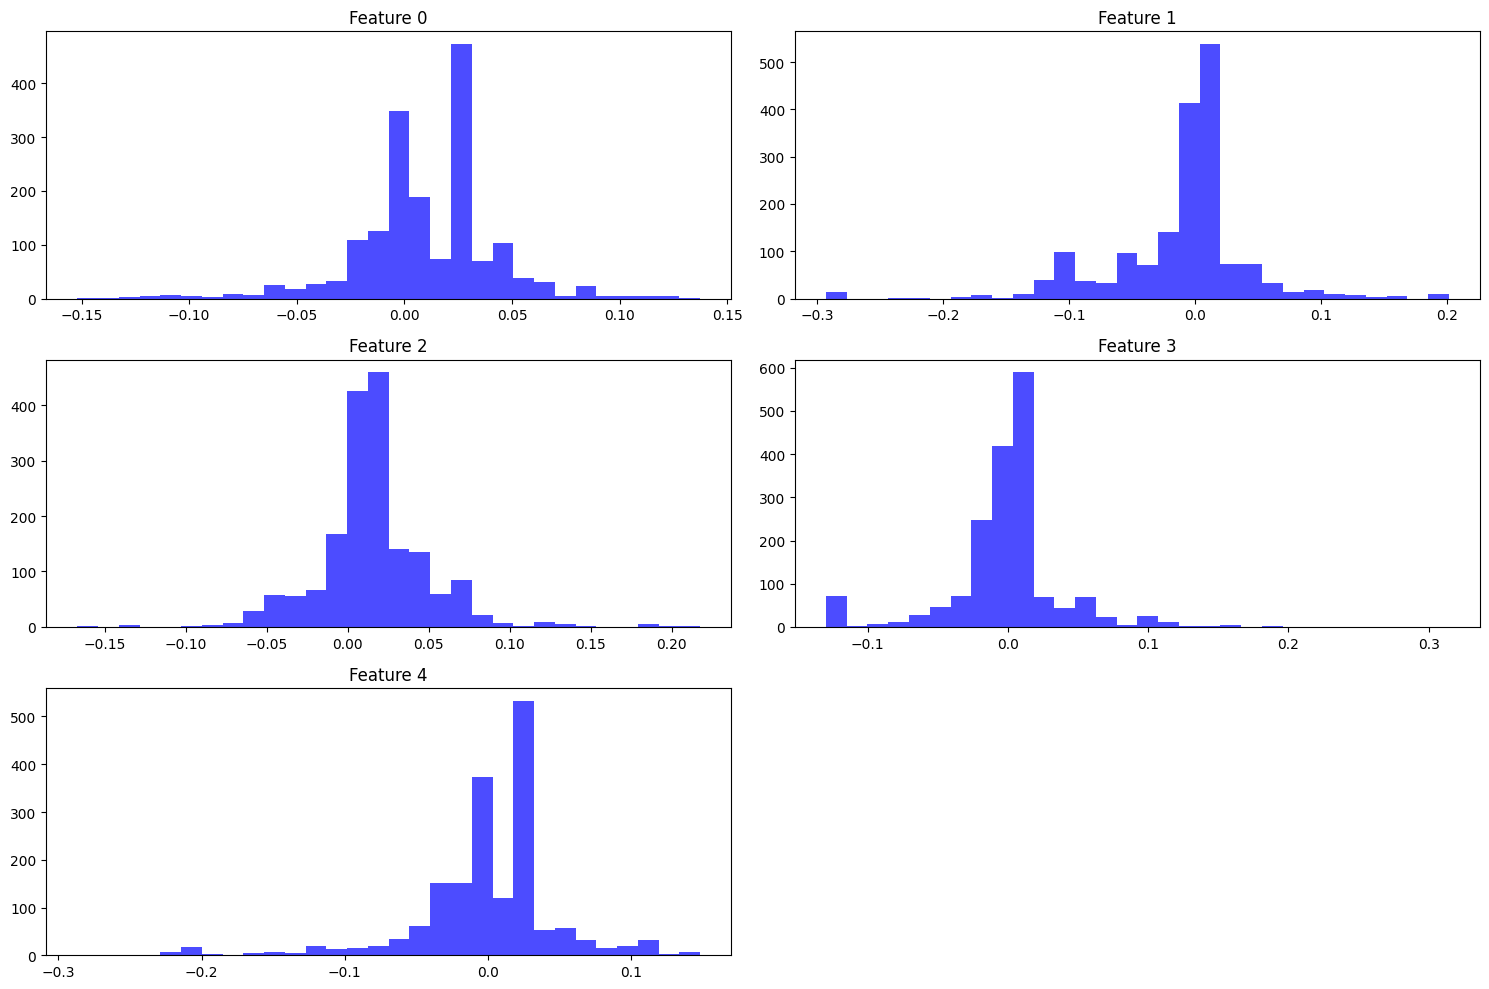

In [5]:
import matplotlib.pyplot as plt

# Plotting histograms for a few random features
# Use .iloc to access columns by their integer position
features_to_plot = [0, 1, 2, 3, 4]  # Change this to select different features

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i + 1)
    # Access the column by its position using .iloc
    plt.hist(df.iloc[:, feature], bins=30, alpha=0.7, color='blue')
    plt.title(f'Feature {feature}')
plt.tight_layout()
plt.show()

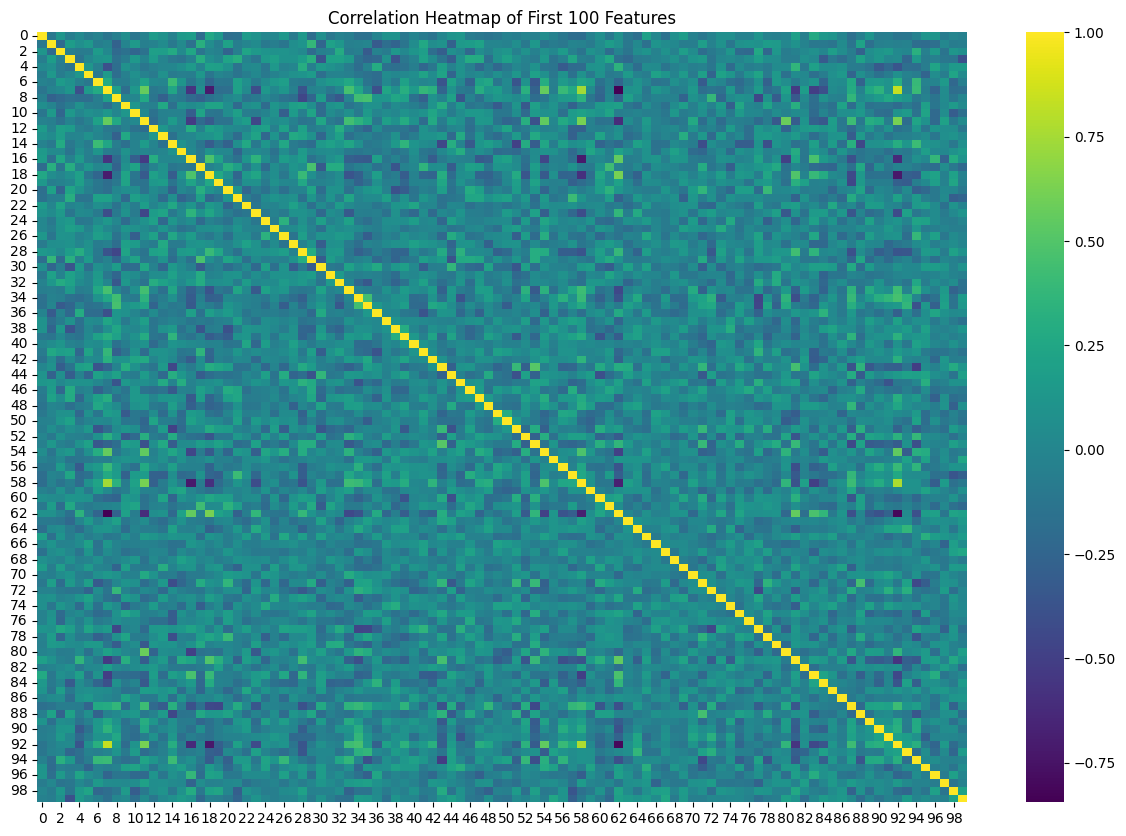

In [7]:
import seaborn as sns

# Calculating the correlation matrix
corr_matrix = df.iloc[:, :100].corr()  # Limiting to the first 100 features for simplicity

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='viridis', cbar=True)
plt.title('Correlation Heatmap of First 100 Features')
plt.show()

Data Pre-Processing: Data Loader

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Assuming the last column is the label
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Setting up a Neural Network Model:

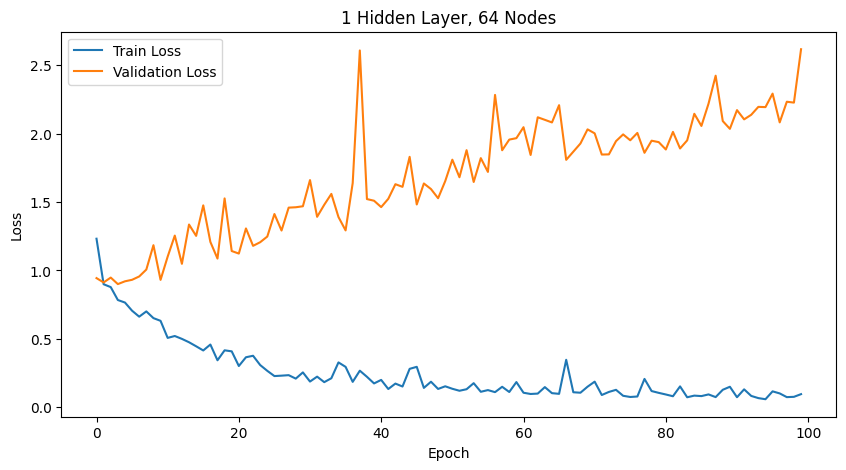

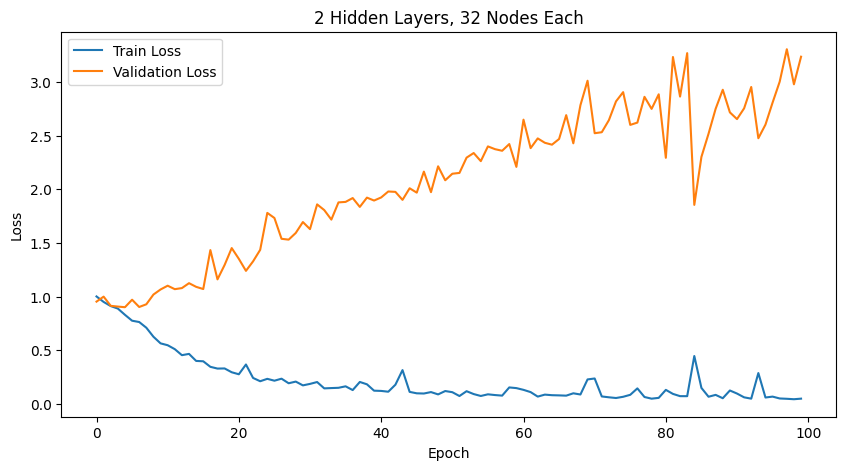

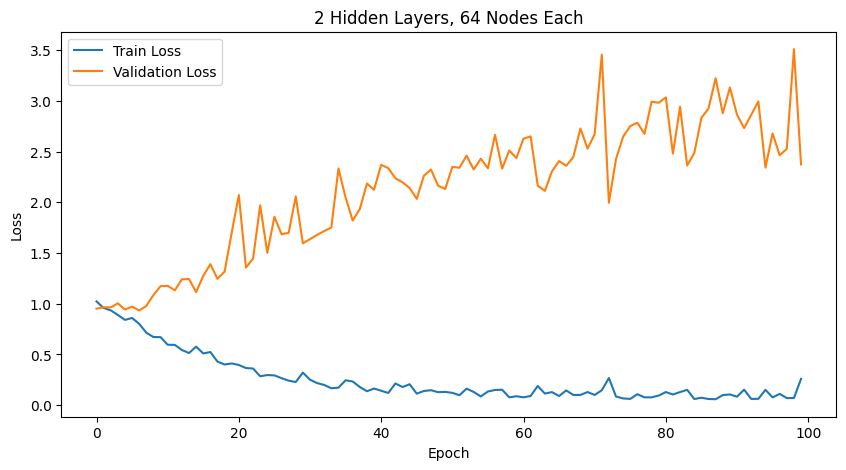

Model 1 - 1 hidden layer, 64 nodes
Accuracy: 0.5599, F1 Score: 0.5564
Class-wise Accuracy: {0: 0.1650485436893204, 1: 0.5604395604395604, 2: 0.7153846153846154}

Model 2 - 2 hidden layers, 32 nodes each
Accuracy: 0.6137, F1 Score: 0.5919
Class-wise Accuracy: {0: 0.13592233009708737, 1: 0.8131868131868132, 2: 0.45384615384615384}

Model 3 - 2 hidden layers, 64 nodes each
Accuracy: 0.6051, F1 Score: 0.5892
Class-wise Accuracy: {0: 0.07766990291262135, 1: 0.7296703296703296, 2: 0.5961538461538461}


In [9]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_nodes, output_size):
        super(NeuralNetwork, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_nodes[0]))
        layers.append(nn.ReLU())
        for i in range(1, hidden_layers):
            layers.append(nn.Linear(hidden_nodes[i-1], hidden_nodes[i]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_nodes[-1], output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

input_size = X_train.shape[1]
output_size = len(set(y))


import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def train_and_evaluate(hidden_layers, hidden_nodes, learning_rate=0.001, epochs=100):
    model = NeuralNetwork(input_size, hidden_layers, hidden_nodes, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))

    return model, train_losses, val_losses

def plot_losses(train_losses, val_losses, title):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def evaluate_model(model, data_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return accuracy, f1

def class_wise_accuracy(model, data_loader):
    model.eval()
    correct_preds = {label: 0 for label in set(y)}
    total_preds = {label: 0 for label in set(y)}
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for label, pred in zip(labels, preds):
                if label == pred:
                    correct_preds[label.item()] += 1
                total_preds[label.item()] += 1
    class_accuracy = {label: correct_preds[label] / total_preds[label] for label in correct_preds}
    return class_accuracy


# Model 1: 1 hidden layer, 64 hidden nodes
model1, train_losses1, val_losses1 = train_and_evaluate(1, [64])
accuracy1, f1_score1 = evaluate_model(model1, val_loader)
class_accuracy1 = class_wise_accuracy(model1, val_loader)
plot_losses(train_losses1, val_losses1, '1 Hidden Layer, 64 Nodes')

# Model 2: 2 hidden layers, 32 hidden nodes each
model2, train_losses2, val_losses2 = train_and_evaluate(2, [32, 32])
accuracy2, f1_score2 = evaluate_model(model2, val_loader)
class_accuracy2 = class_wise_accuracy(model2, val_loader)
plot_losses(train_losses2, val_losses2, '2 Hidden Layers, 32 Nodes Each')

# Model 3: 2 hidden layers, 64 hidden nodes eachS
model3, train_losses3, val_losses3 = train_and_evaluate(2, [64, 64])
accuracy3, f1_score3 = evaluate_model(model3, val_loader)
class_accuracy3 = class_wise_accuracy(model3, val_loader)
plot_losses(train_losses3, val_losses3, '2 Hidden Layers, 64 Nodes Each')

# Comparing the models
print("Model 1 - 1 hidden layer, 64 nodes")
print(f"Accuracy: {accuracy1:.4f}, F1 Score: {f1_score1:.4f}")
print(f"Class-wise Accuracy: {class_accuracy1}")

print("\nModel 2 - 2 hidden layers, 32 nodes each")
print(f"Accuracy: {accuracy2:.4f}, F1 Score: {f1_score2:.4f}")
print(f"Class-wise Accuracy: {class_accuracy2}")

print("\nModel 3 - 2 hidden layers, 64 nodes each")
print(f"Accuracy: {accuracy3:.4f}, F1 Score: {f1_score3:.4f}")
print(f"Class-wise Accuracy: {class_accuracy3}")

Early stopping triggered


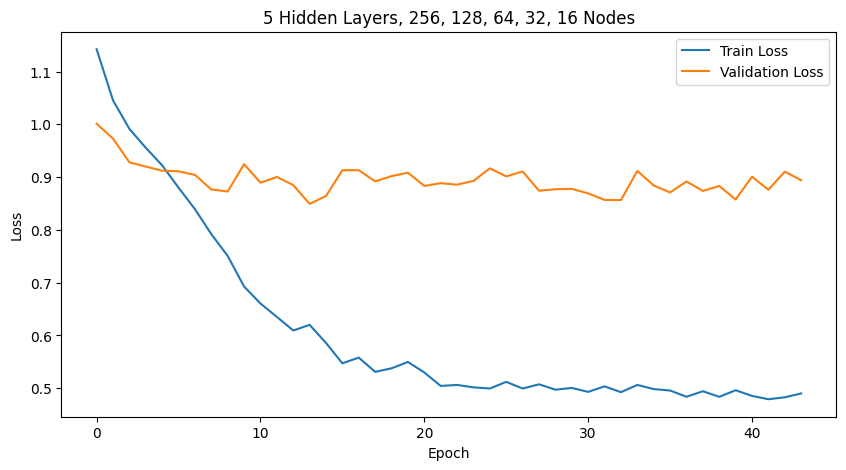

Model with 5 hidden layers, 256, 128, 64, 32, 16 nodes
Accuracy: 0.6333, F1 Score: 0.6063
Class-wise Accuracy: {0: 0.05825242718446602, 1: 0.7626373626373626, 2: 0.6346153846153846}


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler


# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Assuming the last column is the label
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_nodes, output_size, dropout_rate=0.5):
        super(NeuralNetwork, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_nodes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(hidden_nodes[0]))
        layers.append(nn.Dropout(dropout_rate))
        for i in range(1, hidden_layers):
            layers.append(nn.Linear(hidden_nodes[i-1], hidden_nodes[i]))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_nodes[i]))
            layers.append(nn.Dropout(dropout_rate))
        layers.append(nn.Linear(hidden_nodes[-1], output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

input_size = X_train.shape[1]
output_size = len(set(y))

import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score as sklearn_f1_score
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate(hidden_layers, hidden_nodes, learning_rate=0.001, epochs=100, dropout_rate=0.5, weight_decay=0.01, early_stopping_patience=10):
    model = NeuralNetwork(input_size, hidden_layers, hidden_nodes, output_size, dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    best_val_loss = np.inf
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered")
                break

    # Load the best model
    model.load_state_dict(torch.load('best_model.pth'))

    return model, train_losses, val_losses

def plot_losses(train_losses, val_losses, title):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def evaluate_model(model, data_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = sklearn_f1_score(all_labels, all_preds, average='weighted')
    return accuracy, f1

def class_wise_accuracy(model, data_loader):
    model.eval()
    correct_preds = {label: 0 for label in set(y)}
    total_preds = {label: 0 for label in set(y)}
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for label, pred in zip(labels, preds):
                if label == pred:
                    correct_preds[label.item()] += 1
                total_preds[label.item()] += 1
    class_accuracy = {label: correct_preds[label] / total_preds[label] for label in correct_preds}
    return class_accuracy

# Model with more layers and nodes, regularization, and early stopping
model, train_losses, val_losses = train_and_evaluate(
    hidden_layers=5,
    hidden_nodes=[128,128,64,32,16],
    learning_rate=0.0003,
    epochs=100,
    dropout_rate=0.3,
    weight_decay=0.07,
    early_stopping_patience=30
)
accuracy, f1 = evaluate_model(model, val_loader)
class_accuracy = class_wise_accuracy(model, val_loader)
plot_losses(train_losses, val_losses, '5 Hidden Layers, 256, 128, 64, 32, 16 Nodes')

# Print results
print("Model with 5 hidden layers, 256, 128, 64, 32, 16 nodes")
print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
print(f"Class-wise Accuracy: {class_accuracy}")

In [14]:
!pip install torchviz graphviz
from torchviz import make_dot
# Create a dummy input tensor
dummy_input = torch.randn(1, input_size)

# Perform a forward pass to create the graph
model_output = model(dummy_input)

# Visualize the graph
model_viz = make_dot(model_output, params=dict(model.named_parameters()))
model_viz.render("custom_model",format="png")

'custom_model.png'

['train.csv', 'sample_submission.csv', 'test.csv', 'test_predictions_final.csv', 'best_model.pth', 'custom_model', 'custom_model.png']


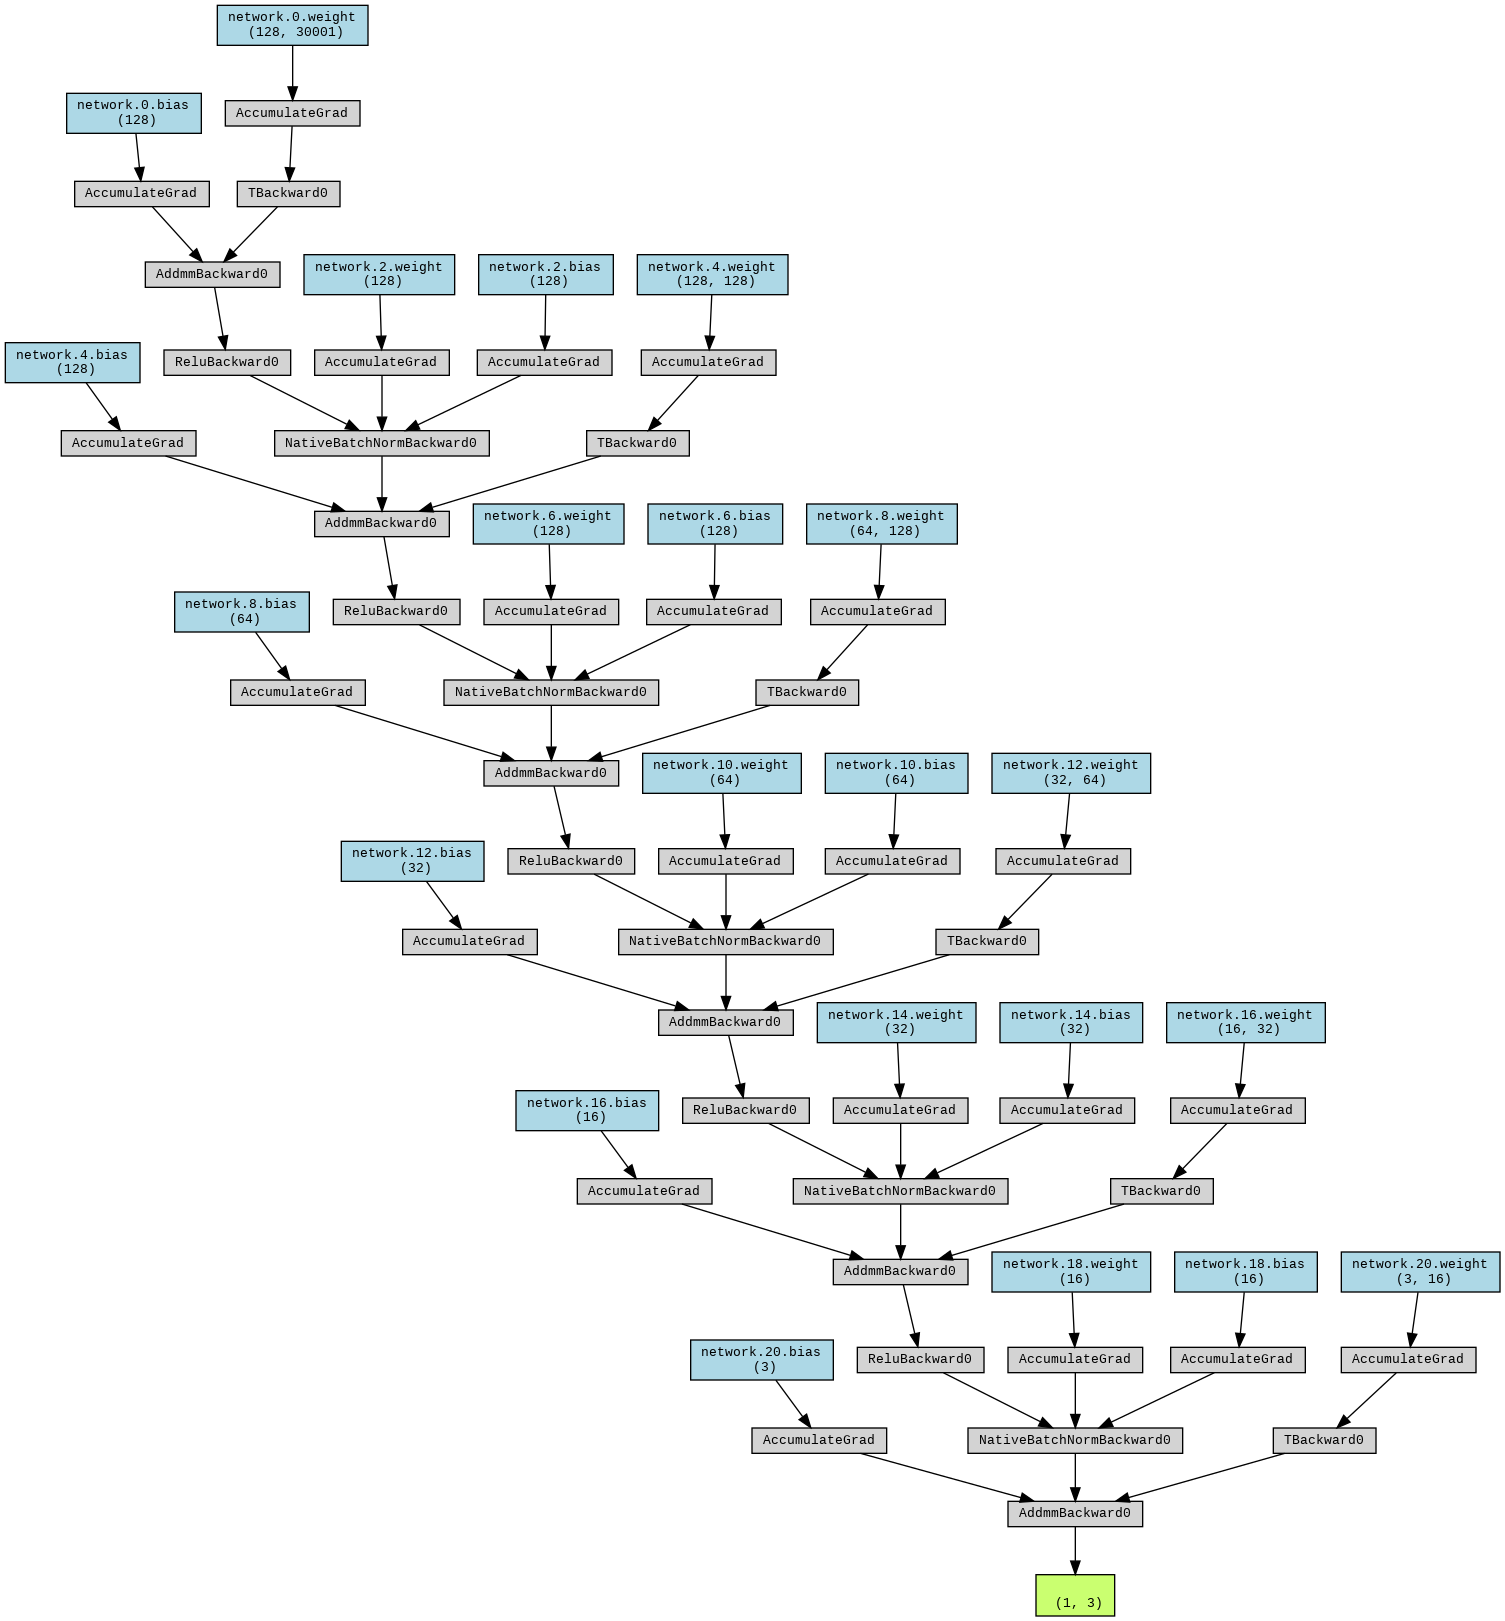

In [16]:
import os
print(os.listdir())
from IPython.display import Image
Image("custom_model.png")

In [11]:
# Assuming the test dataframe has an 'ID' column
test_ids = test_df['ID'].values

# Preprocess the test data
X_test = test_df.values  # Assuming the first column is 'ID' and the last column is 'Label'

# Feature scaling (using the scaler fitted on the training data)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Create a dataset and dataloader (note: no labels for the test dataset)
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to make predictions on the test data
def predict(model, data_loader):
    model.eval()
    all_preds = []
    with torch.no_grad():
        for inputs in data_loader:
            inputs = inputs[0]  # Since the test_loader returns inputs as a tuple (inputs,)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
    return all_preds

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Make predictions on the test data
test_predictions = predict(model, test_loader)

# Create a dataframe for the predictions
output_df = pd.DataFrame({'ID': test_ids, 'Label': test_predictions})

# Save the predictions to a CSV file
output_df.to_csv('test_predictions_final.csv', index=False)

print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv
